<a href="https://colab.research.google.com/github/hardikkamboj/AI-Champ/blob/master/Week%206%20-%20NLP/nlp_task_getting_combined_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
from glob import glob

import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# unzipping the file
!unzip '/content/gdrive/My Drive/reviews.zip'

In [ ]:
review_files = glob('/content/reviews/*.csv')
print('Number of csv files are ',len(review_files))

Number of csv files are  9742


## Examening the number of Reviews 

In [ ]:
num_reviews = [] # for storing length of each file (number of rows)
num_cols = []  # for storing number of cols (to checl whether all have same cols or not)
for file in tqdm(review_files):
  df = pd.read_csv(file)
  num_reviews.append(len(df))
  num_cols.append(df.shape[1])

100%|██████████| 9742/9742 [00:59<00:00, 162.46it/s]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


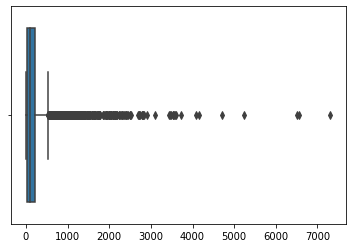

In [ ]:
sns.boxplot(num_reviews)

In [ ]:
num_reviews.count(0) # files with no rows (empty files)

28

In [ ]:
pd.DataFrame(num_reviews).describe()

,0
count,9742.000000
mean,200.653254
std,343.787173
min,0.000000
25%,25.000000
50%,99.000000
75%,225.000000
max,7307.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,0
count,9742.0
mean,6.0
std,0.0
min,6.0
25%,6.0
50%,6.0
75%,6.0
max,6.0


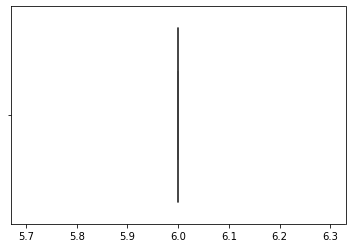

In [ ]:
# cols 
sns.boxplot(num_cols)
pd.DataFrame(num_cols).describe()
# std = 0, so each of them has same number of cols 

The number of reviews in a csv may vary, some files even has no reviews, but the number of cols in each of the files is same, ie 6

## Look at a sample file

In [ ]:
sample = review_files[0]
sample_df = pd.read_csv(sample)
print(len(sample_df))
sample_df.head()

324


,movie_id,review,date,helpful,helpful_out_of,rating
0,91064,David Cronenberg redefined what we think of as...,2003-07-16,192,228,10.0
1,91064,My all time favorite horror film and everyone ...,2017-09-03,16,17,10.0
2,91064,Most science fiction films are big on ideas an...,2005-06-07,148,187,8.0
3,91064,It's been over 20 years since this movie was m...,2007-03-08,93,119,9.0
4,91064,The Fly is more than a horror movie it's a sta...,2002-09-14,123,163,10.0


In [ ]:
sample_df.shape

(324, 6)

In [ ]:
sample_df.isnull().sum()

movie_id           0
review             0
date               0
helpful            0
helpful_out_of     0
rating            45
dtype: int64

We can see here that there are some reviews in which there is no ratings, we will be discarding these rows. 

In [ ]:
sample_df.describe()

,movie_id,helpful,helpful_out_of,rating
count,324.0,324.000000,324.000000,279.000000
mean,91064.0,4.401235,7.358025,8.440860
std,0.0,18.220854,23.667490,1.630172
min,91064.0,0.000000,0.000000,1.000000
25%,91064.0,0.000000,1.000000,8.000000
50%,91064.0,1.000000,2.000000,9.000000
75%,91064.0,2.000000,4.000000,10.000000
max,91064.0,192.000000,228.000000,10.000000


# Filtering the files and combining it to a single file

In [ ]:
total_df = None

for review_csv in tqdm(review_files):
  df = pd.read_csv(review_csv)
  if len(df) > 0: # select only non empty files
    df_non_na = df.dropna()
    if type(total_df) == pd.core.frame.DataFrame:
      total_df = pd.concat([total_df,df_non_na])  # concat the file to total_df
    else:
      total_df = df_non_na # runs for the first iteration

100%|██████████| 9742/9742 [14:25<00:00, 11.26it/s]


In [ ]:
total_df.shape #woah

(1683268, 6)

In [ ]:
# save this csv file to drive
total_df.to_csv('/content/gdrive/My Drive/total_data.csv')